In [1]:
import os
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#read data
df = pd.read_csv('201501-citibike-tripdata.csv')

In [3]:
#divide the data into male and female groups
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

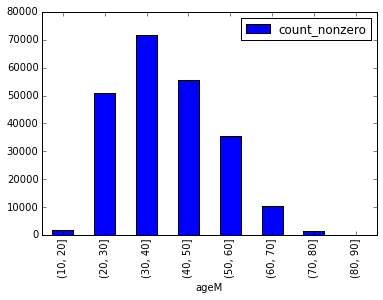

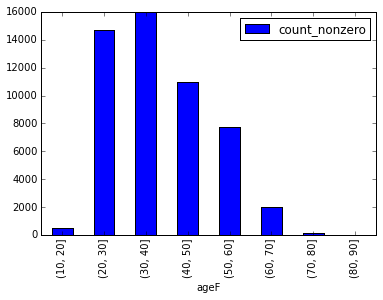

In [4]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


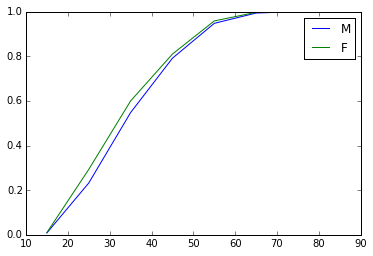

In [19]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()


In [18]:
#KS test first, alpha=.05
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.61519793242561782, 0.0)


In [ ]:
#the p-value = 0 which is less than alpha=.05, so we can reject the null hypothesis

In [14]:
#before pearson and spearman test, we have to make the size of male and female riders the equal. to do this we can take a random sample from all the male riders
df.ageM.random = np.random.choice(df.ageM[~np.isnan(df.ageM)], len(df.ageF[~np.isnan(df.ageF)]), replace=False)

In [16]:
#pearson's test
pearson=scipy.stats.pearsonr(df.ageM.random, df.ageF[~np.isnan(df.ageF)])
print pearson

(0.0071041276484386309, 0.10492761561640009)


In [ ]:
#the p-value = 0.105 which is greater than alpha=.05, so we do not reject the H0

In [17]:
#spearman's test
spearman = scipy.stats.spearmanr(df.ageM.random, df.ageF[~np.isnan(df.ageF)])
print spearman

(0.0045428805437191357, 0.29980923128835607)


In [ ]:
#the p-value = 0.3 which is greater than alpha=.05, so we do not reject the H0
#in KS test we reject H0 but in pearson and spearman's test we do not reject H0. 
#it may need further information to determine is the distributions of ages is the same for males and females.

In [25]:
#next do three test for day and night riders, first divide the data into two groups
df['starthour'] = pd.DatetimeIndex(df['starttime']).hour
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starthour'] >= 6) & (df['starthour'] < 18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['starthour'] < 6) | (df['starthour'] >= 18))]

In [32]:
#KS test, alpha=.05
ks2=scipy.stats.ks_2samp(df.ageD, df.ageN)
print ks2

(0.41810248220989527, 0.0)


In [ ]:
#p-value =0 which is less than alpha=.05, so we reject H0

In [33]:
#random day riders as the size of night riders
df.ageD.random = np.random.choice(df.ageD[~np.isnan(df.ageD)], len(df.ageN[~np.isnan(df.ageN)]), replace=False)

In [34]:
#pearson's test alpha=.05
pearson2=scipy.stats.pearsonr(df.ageD.random, df.ageN[~np.isnan(df.ageN)])
print pearson2

(0.0034513576516450547, 0.32816993346937984)


In [ ]:
#p-value = 0.33 which is greater than .05, so we do not reject H0

In [35]:
#spearmam's test alpha=.05
spearman2=scipy.stats.spearmanr(df.ageD.random, df.ageN[~np.isnan(df.ageN)])
print spearman2

(0.0029440641919547933, 0.40423345785584186)


In [ ]:
#p-value = 0.4 which is greater than .05, so we do not reject H0
#in KS test we reject H0 but in pearson and spearman's test we do not reject H0. 
#it may need further information to determine is the distributions of ages is the same for day and night riders.